<a href="https://colab.research.google.com/github/mhdh-9/Image-Processing/blob/main/Image_Compression_using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

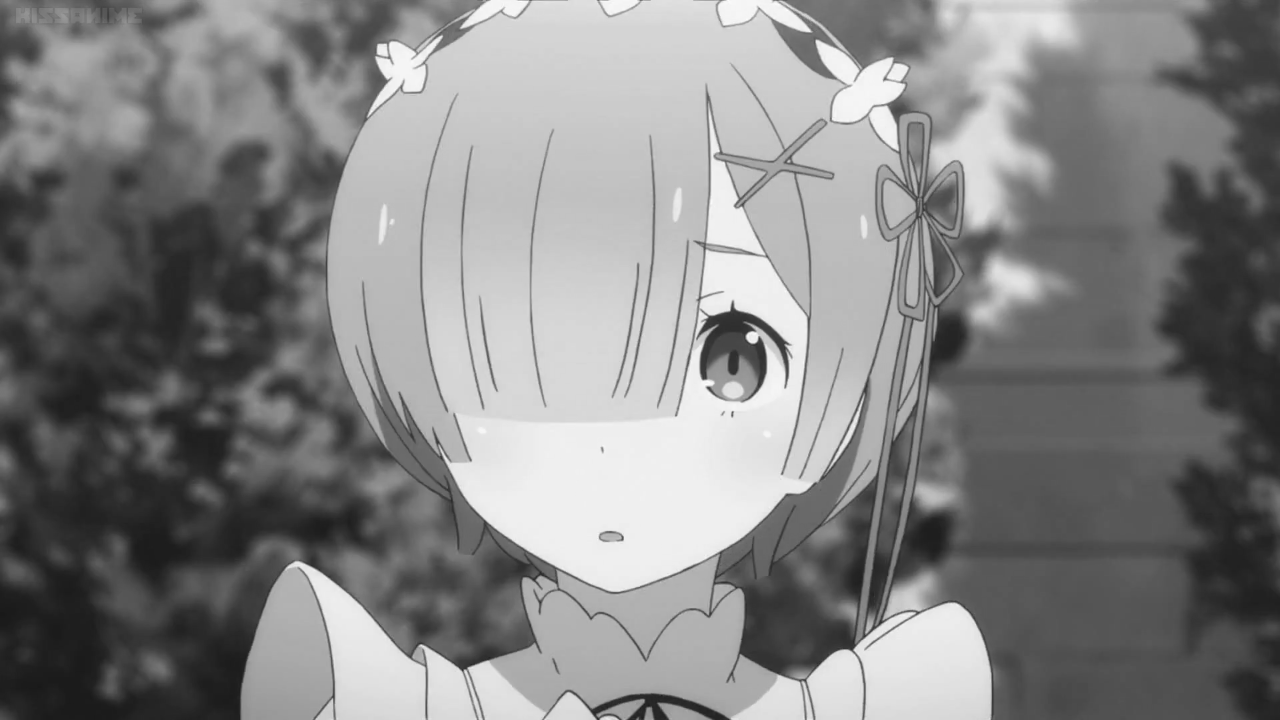

In [30]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#upload the image before running 
img = cv2.imread('rem.png',0)
if img is None:
    print("Could not read the image -> upload the image, if not uploaded")
    sys.exit()
cv2_imshow(img)
img = img.astype(float)



# PCA 


---


Function Definition

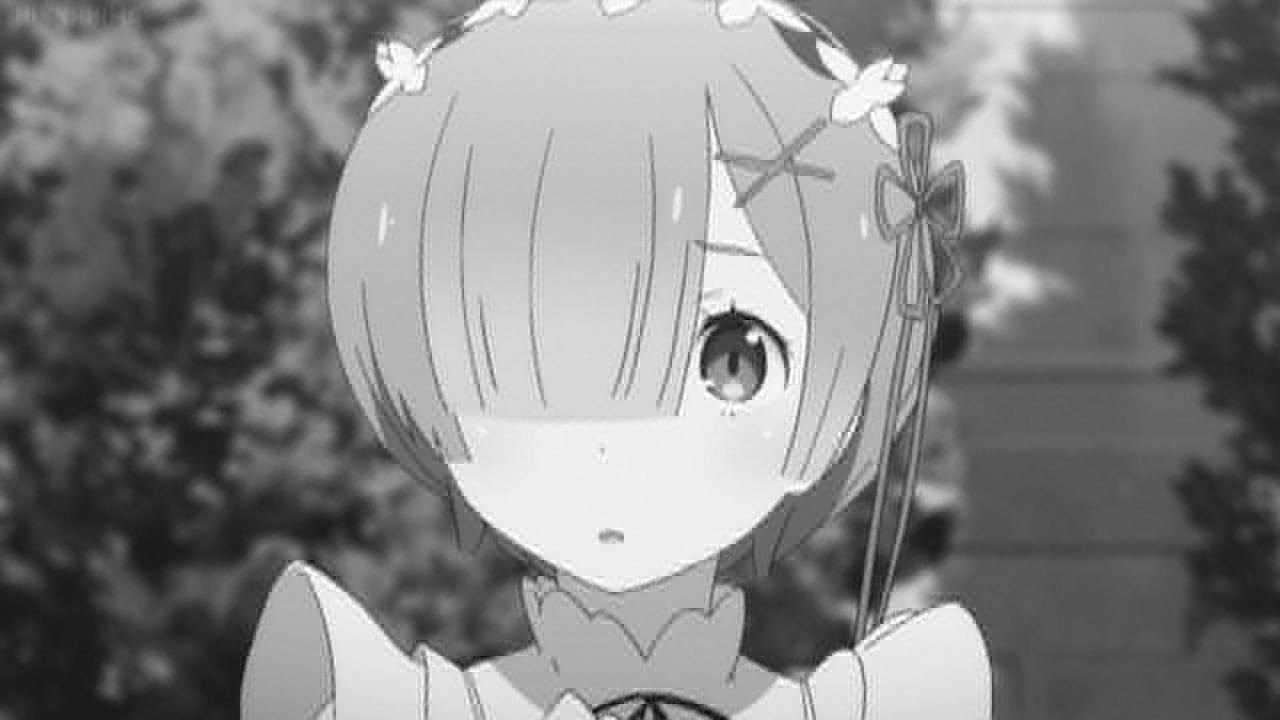

In [36]:

rows,cols = img.shape

#cv2.imshow("original image",img)

r=rows//16
c=cols//16

#print(r,c)
blocks=np.zeros([ r*c , 256 ]);

#dividing into blocks (r*c*256)
for i in range(0,r*16,16):
    for j in range(0,c*16,16):
        blocks[ (i//16)*c + j//16 ]=np.array(img[i:i+16, j:j+16]).flatten()
    

# calculate the mean of each column
meanM = np.mean(blocks.T, axis=1)

# center columns by subtracting column means
centerM = blocks - meanM

covM = np.cov(centerM.T)

eigen_values, eigen_vectors = np.linalg.eig(covM)


sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
    

#take the top k Vectors
k=15
kd = sorted_eigenvectors[:,0:k]


data_reduced = np.dot(centerM, kd) # transform
data_original = np.dot(data_reduced, kd.T) # inverse_transform

data_original+=meanM

Compressed_img = np.zeros([rows,cols])
#combining the blocks back into image
for i in range(0,r*16,16):
    for j in range(0,c*16,16):
        Compressed_img[i:i+16, j:j+16]= np.reshape( data_original[ (i//16)*c + j//16 ] , (16, 16))

cv2.imwrite('Compressed.jpg',Compressed_img)
cv2_imshow(Compressed_img)
    

# PCA Variance plot

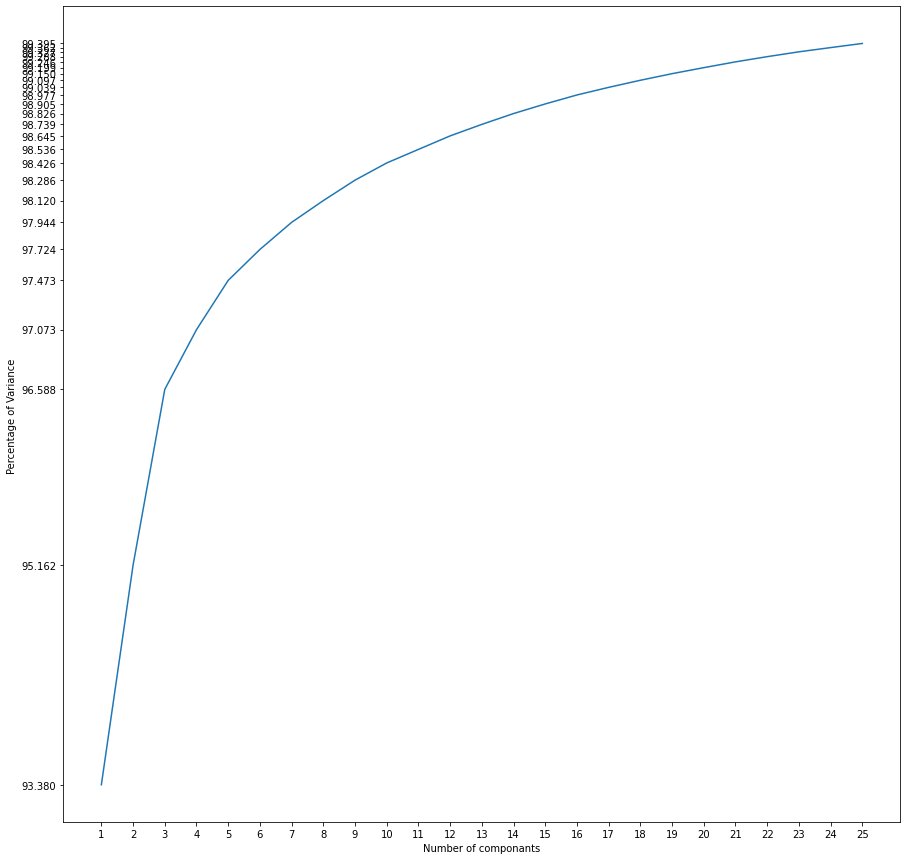

In [37]:
k=25
# Plotting the Percentage of Variance  vs Number of componants
sum_eigenvalues = np.sum(eigen_values)
xpoints = np.arange(1,k+1)
ypoints = (np.cumsum((sorted_eigenvalue[:k])/sum_eigenvalues)*100)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
plt.xticks(xpoints)
plt.yticks(ypoints)

plt.xlabel("Number of componants")
plt.ylabel("Percentage of Variance ")
plt.plot(xpoints, ypoints)
plt.show()
